In [1]:
import pickle
try:
    with open('results.pkl', 'rb') as f:
        data = pickle.load(f)
    print(data)
except FileNotFoundError:
    print(f"File not found: 'results.pkl'")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [2]:
import pandas as pd
%pip install seaborn
import seaborn as sns
%pip install matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore
import numpy as np



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_pickle("results.pkl")
print(data["fib"].keys())

dict_keys([10, 35, 40])


In [4]:
split_dfs = {}

for fib_n in data["fib"]:  # 5, 35
    for language in data["fib"][fib_n]:  # rust, cpp, nonservice
        summary_rows = []
        for df in data["fib"][fib_n][language]: #each experiment
            if "PACKAGE_ENERGY (J)" in df.columns:
                energy = df["PACKAGE_ENERGY (J)"].iloc[-1] - df["PACKAGE_ENERGY (J)"].iloc[0]
                if "TIME" in df.columns:
                    time_diff = df['TIME'].iloc[-1] - df['TIME'].iloc[0]
                elif "Time" in df.columns:
                    time_diff = df['Time'].iloc[-1] - df['Time'].iloc[0]
                summary_rows.append({
                    "PACKAGE ENERGY (J)": energy,
                    "EDP": time_diff,
                    "tool": language,
                    "fib": fib_n
                })
            

        summary_df = pd.DataFrame(summary_rows)
        # remove outliers from each experiment set
        if 'PACKAGE ENERGY (J)' in summary_df.columns:
            z_scores = zscore(summary_df['PACKAGE ENERGY (J)'])
            full_df = summary_df[np.abs(z_scores) < 2]

        split_dfs[f"{language}_{fib_n}"] = summary_df
        print(f"{language}_{fib_n}")

rust_10 = split_dfs["rust_10"]
rust_35 = split_dfs["rust_35"]
rust_40 = split_dfs["rust_40"]
cpp_10 = split_dfs["cpp_10"]
cpp_35 = split_dfs["cpp_35"]
cpp_40 = split_dfs["cpp_40"]
nonservice_10 = split_dfs["nonservice_10"]
nonservice_35 = split_dfs["nonservice_35"]
nonservice_40 = split_dfs["nonservice_40"]

rust_10
cpp_10
nonservice_10
rust_35
cpp_35
nonservice_35
rust_40
cpp_40
nonservice_40


In [5]:
_, p_rust_10 = shapiro(rust_10['PACKAGE ENERGY (J)'])
_, p_rust_35 = shapiro(rust_35['PACKAGE ENERGY (J)'])
_, p_rust_40 = shapiro(rust_40['PACKAGE ENERGY (J)'])
_, p_cpp_10 = shapiro(cpp_10['PACKAGE ENERGY (J)'])
_, p_cpp_35 = shapiro(cpp_35['PACKAGE ENERGY (J)'])
_, p_cpp_40 = shapiro(cpp_40['PACKAGE ENERGY (J)'])
_, p_nonservice_10 = shapiro(nonservice_10['PACKAGE ENERGY (J)'])
_, p_nonservice_35 = shapiro(nonservice_35['PACKAGE ENERGY (J)'])
_, p_nonservice_40 = shapiro(nonservice_40['PACKAGE ENERGY (J)'])
print("P-value for Rust with Fib(5): ", p_rust_10, "Normal distribution" if p_rust_10 > 0.05 else "Not normal distribution")
print("P-value for Rust with Fib(35):", p_rust_35, "Normal distribution" if p_rust_35 > 0.05 else "Not normal distribution")
print("P-value for Rust with Fib(40):", p_rust_40, "Normal distribution" if p_rust_40 > 0.05 else "Not normal distribution")
print("P-value for C++ with Fib(5): ", p_cpp_10, "Normal distribution" if p_cpp_10 > 0.05 else "Not normal distribution")
print("P-value for C++ with Fib(35):", p_cpp_35, "Normal distribution" if p_cpp_35 > 0.05 else "Not normal distribution")
print("P-value for C++ with Fib(40):", p_cpp_40, "Normal distribution" if p_cpp_40 > 0.05 else "Not normal distribution")
print("P-value for bash EnergiBridge with Fib(5): ", p_nonservice_10, "Normal distribution" if p_nonservice_10 > 0.05 else "Not normal distribution")
print("P-value for bash EnergiBridge with Fib(35):", p_nonservice_35, "Normal distribution" if p_nonservice_35 > 0.05 else "Not normal distribution")
print("P-value for bash EnergiBridge with Fib(40):", p_nonservice_40, "Normal distribution" if p_nonservice_40 > 0.05 else "Not normal distribution")



P-value for Rust with Fib(5):  8.432823026835896e-06 Not normal distribution
P-value for Rust with Fib(35): 0.08831722340869604 Normal distribution
P-value for Rust with Fib(40): 0.001481008661173533 Not normal distribution
P-value for C++ with Fib(5):  0.0004646505502607065 Not normal distribution
P-value for C++ with Fib(35): 0.026462329056565967 Not normal distribution
P-value for C++ with Fib(40): 0.002827365915040318 Not normal distribution
P-value for bash EnergiBridge with Fib(5):  0.018130618187199878 Not normal distribution
P-value for bash EnergiBridge with Fib(35): 0.00040868433622499476 Not normal distribution
P-value for bash EnergiBridge with Fib(40): 9.96085203101256e-05 Not normal distribution


/var/folders/2x/yr46rn912_91htch_br0s2x80000gn/T/ipykernel_50320/568269010.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


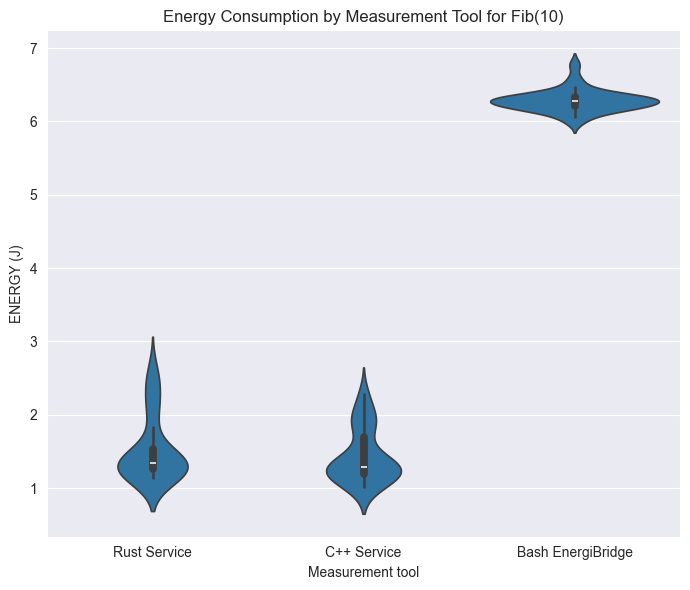

In [6]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([rust_10, cpp_10, nonservice_10]))
plt.title("Energy Consumption by Measurement Tool for Fib(10)")
plt.xlabel("Measurement tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.tight_layout()
plt.show()

/var/folders/2x/yr46rn912_91htch_br0s2x80000gn/T/ipykernel_50320/3442396062.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


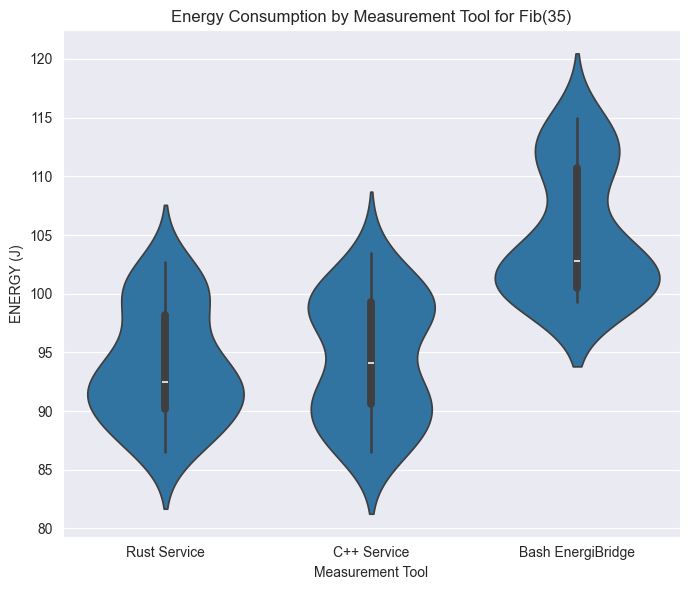

In [7]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([rust_35, cpp_35, nonservice_35]))
plt.title("Energy Consumption by Measurement Tool for Fib(35)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.tight_layout()
plt.show()

/var/folders/2x/yr46rn912_91htch_br0s2x80000gn/T/ipykernel_50320/3484321228.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


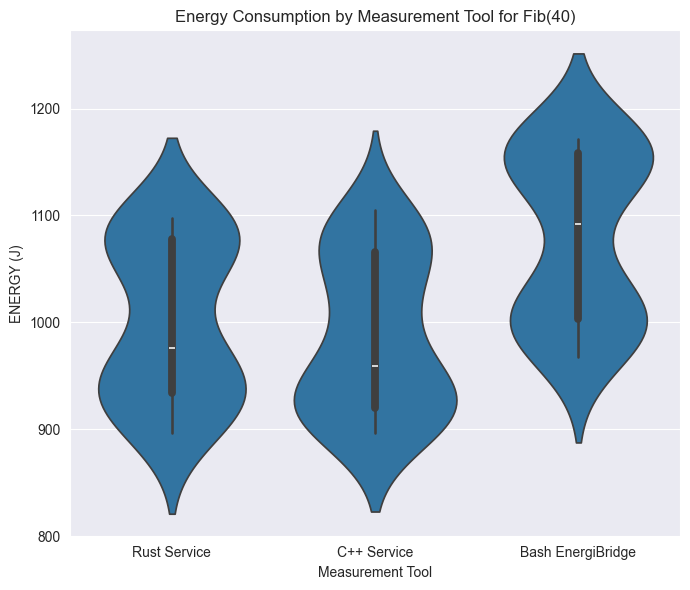

In [8]:
plt.figure(figsize=(7, 6))
ax = sns.violinplot(x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([rust_40, cpp_40, nonservice_40]))
plt.title("Energy Consumption by Measurement Tool for Fib(40)")
plt.xlabel("Measurement Tool")
plt.ylabel("ENERGY (J)")
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.tight_layout()
plt.show()

/var/folders/2x/yr46rn912_91htch_br0s2x80000gn/T/ipykernel_50320/1721979760.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


Text(0, 0.5, '')

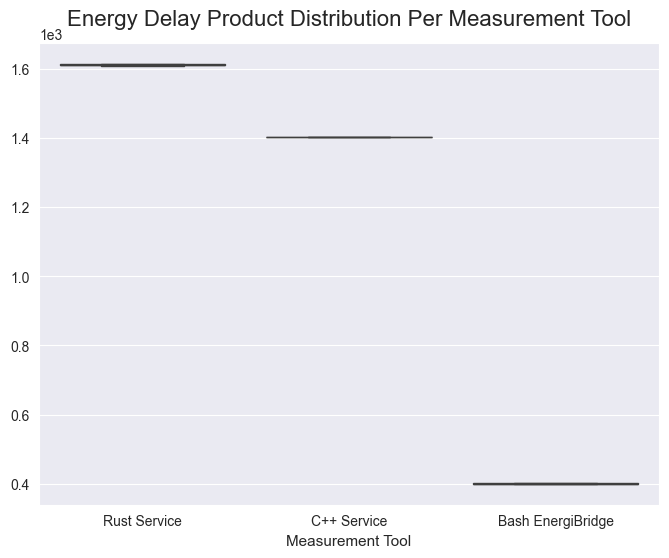

In [9]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([rust_10, cpp_10, nonservice_10]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Per Measurement Tool', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

/var/folders/2x/yr46rn912_91htch_br0s2x80000gn/T/ipykernel_50320/298730127.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


Text(0, 0.5, '')

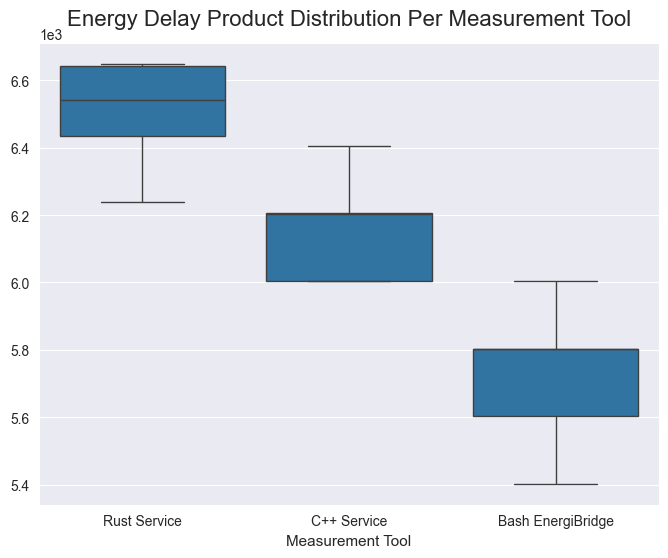

In [10]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([rust_35, cpp_35, nonservice_35]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Per Measurement Tool', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

/var/folders/2x/yr46rn912_91htch_br0s2x80000gn/T/ipykernel_50320/809396828.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])


Text(0, 0.5, '')

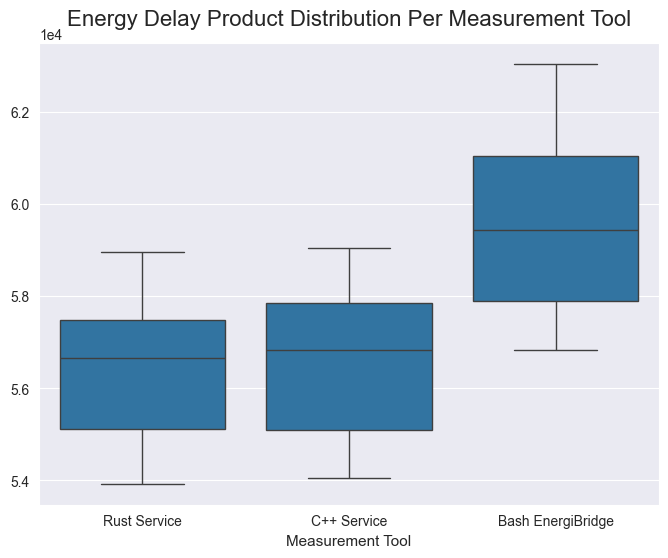

In [11]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([rust_40, cpp_40, nonservice_40]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Per Measurement Tool', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Bash EnergiBridge"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')